<a href="https://colab.research.google.com/github/KamyllaJawad/8-Fase-Exercicios/blob/master/NS_AP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Preditiva de Venda de Bicicletas

Dados utilizados: [KAGGLE - SAP Bikes Sales sample data](https://www.kaggle.com/datasets/yasinnaal/bikes-sales-sample-data)

In [172]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [173]:
# Carregar o arquivo Excel
df = pd.read_excel('historico_vendas.xls')

# Exibir as primeiras linhas do DataFrame
print(df.head())

                       createdat productid  quantity prodcategoryid  \
0  2018/01/11 00:00:00.000000000   MB-1034         4             MB   
1  2018/01/11 00:00:00.000000000   CB-1161         9             CB   
2  2018/01/12 00:00:00.000000000   HB-1175         2             HB   
3  2018/01/12 00:00:00.000000000   RC-1056         2             RC   
4  2018/01/12 00:00:00.000000000   CC-1021         3             CC   

        short_descr  
0     Mountain Bike  
1           Cruiser  
2       Hybrid Bike  
3       Racing Bike  
4  Cyclo-cross Bike  


In [174]:
# Converter a coluna 'createdat' para o tipo data
df['createdat'] = pd.to_datetime(df['createdat'])

# Converter a coluna 'quantity' para o tipo numérico
df['quantity'] = pd.to_numeric(df['quantity'])

# Converter a coluna 'quantity' para o tipo numérico
df['quantity'] = pd.to_numeric(df['quantity'])

# Criar coluna separada para o mês
df['month'] = df['createdat'].dt.month

# Lista das categorias de bicicletas
categorias = df['prodcategoryid'].unique()

In [175]:
# Loop para fazer as previsões para cada categoria e mês
for categoria in categorias:
    for month in range(1, 13):
        # Filtrar o dataframe pela categoria e mês atual
        categoria_mes_df = df[(df['prodcategoryid'] == categoria) & (df['month'] == month)]

        # Verificar se há dados suficientes para estimar os componentes sazonais
        if len(categoria_mes_df) >= 2 * 12:  # Pelo menos dois anos de dados (assumindo sazonalidade anual)
            # Converter a coluna 'createdat' para o índice do dataframe
            categoria_mes_df = categoria_mes_df.set_index('createdat')

            # Criar o modelo de suavização exponencial
            modelo = ExponentialSmoothing(categoria_mes_df['quantity'], seasonal_periods=12, trend='add', seasonal='add')

            # Ajustar o modelo aos dados
            modelo_fit = modelo.fit()

            # Fazer a previsão para os próximos dois anos
            previsao = modelo_fit.predict(start=len(categoria_mes_df), end=len(categoria_mes_df)+23)

            # Arredondar as previsões para números inteiros
            previsao = previsao.round().astype(int)

            # Obter o nome da categoria de bicicleta
            categoria_nome = categoria_mes_df['short_descr'].iloc[0]

            # Imprimir a previsão
            print("Previsão para", categoria_nome + ".")
            for i, valor in enumerate(previsao):
                mes_previsto = categoria_mes_df.index[-1].month + i + 1
                ano_previsto = categoria_mes_df.index[-1].year + (mes_previsto // 12)
                mes_previsto %= 12
                if mes_previsto == 0:
                    mes_previsto = 12
                print(f"{mes_previsto:02d}/{ano_previsto}", "-", valor)
            print()
        else:
            print("Não há dados suficientes para ajustar o modelo para", categoria + " (" + str(month) + ").")
            print()

Não há dados suficientes para ajustar o modelo para MB (1).

Não há dados suficientes para ajustar o modelo para MB (2).

Não há dados suficientes para ajustar o modelo para MB (3).

Não há dados suficientes para ajustar o modelo para MB (4).

Não há dados suficientes para ajustar o modelo para MB (5).

Não há dados suficientes para ajustar o modelo para MB (6).

Não há dados suficientes para ajustar o modelo para MB (7).

Não há dados suficientes para ajustar o modelo para MB (8).

Não há dados suficientes para ajustar o modelo para MB (9).

Não há dados suficientes para ajustar o modelo para MB (10).

Não há dados suficientes para ajustar o modelo para MB (11).

Não há dados suficientes para ajustar o modelo para MB (12).

Não há dados suficientes para ajustar o modelo para CB (1).

Não há dados suficientes para ajustar o modelo para CB (2).

Não há dados suficientes para ajustar o modelo para CB (3).

Não há dados suficientes para ajustar o modelo para CB (4).

Não há dados suficien

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-p

Previsão para Hybrid Bike.
07/2019 - 8
08/2019 - 5
09/2019 - 7
10/2019 - 5
11/2019 - 3
12/2020 - 7
01/2020 - 3
02/2020 - 3
03/2020 - 7
04/2020 - 6
05/2020 - 6
06/2020 - 9
07/2020 - 8
08/2020 - 5
09/2020 - 7
10/2020 - 5
11/2020 - 3
12/2021 - 7
01/2021 - 3
02/2021 - 3
03/2021 - 7
04/2021 - 6
05/2021 - 6
06/2021 - 8

Não há dados suficientes para ajustar o modelo para HB (7).

Não há dados suficientes para ajustar o modelo para HB (8).

Não há dados suficientes para ajustar o modelo para HB (9).

Não há dados suficientes para ajustar o modelo para HB (10).

Não há dados suficientes para ajustar o modelo para HB (11).

Não há dados suficientes para ajustar o modelo para HB (12).

Previsão para Racing Bike.
02/2019 - 6
03/2019 - 8
04/2019 - 8
05/2019 - 7
06/2019 - 7
07/2019 - 8
08/2019 - 6
09/2019 - 6
10/2019 - 5
11/2019 - 6
12/2020 - 5
01/2020 - 4
02/2020 - 6
03/2020 - 9
04/2020 - 8
05/2020 - 7
06/2020 - 7
07/2020 - 9
08/2020 - 6
09/2020 - 7
10/2020 - 5
11/2020 - 7
12/2021 - 6
01/2021 - 4


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-p

Previsão para Racing Bike.
03/2019 - 2
04/2019 - 1
05/2019 - 7
06/2019 - 2
07/2019 - 4
08/2019 - 3
09/2019 - 2
10/2019 - 3
11/2019 - 3
12/2020 - 2
01/2020 - 3
02/2020 - 1
03/2020 - 1
04/2020 - 0
05/2020 - 6
06/2020 - 1
07/2020 - 3
08/2020 - 2
09/2020 - 1
10/2020 - 2
11/2020 - 2
12/2021 - 1
01/2021 - 2
02/2021 - 0

Previsão para Racing Bike.
04/2019 - 3
05/2019 - 6
06/2019 - 11
07/2019 - 7
08/2019 - 8
09/2019 - 6
10/2019 - 8
11/2019 - 8
12/2020 - 7
01/2020 - 5
02/2020 - 8
03/2020 - 8
04/2020 - 4
05/2020 - 7
06/2020 - 11
07/2020 - 8
08/2020 - 9
09/2020 - 7
10/2020 - 9
11/2020 - 9
12/2021 - 7
01/2021 - 6
02/2021 - 9
03/2021 - 9

Previsão para Racing Bike.
05/2019 - 7
06/2019 - 8
07/2019 - 5
08/2019 - 10
09/2019 - 7
10/2019 - 6
11/2019 - 7
12/2020 - 8
01/2020 - 7
02/2020 - 9
03/2020 - 7
04/2020 - 10
05/2020 - 7
06/2020 - 8
07/2020 - 6
08/2020 - 10
09/2020 - 7
10/2020 - 6
11/2020 - 7
12/2021 - 8
01/2021 - 8
02/2021 - 9
03/2021 - 8
04/2021 - 10



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-p

Previsão para Racing Bike.
06/2019 - 4
07/2019 - 6
08/2019 - 8
09/2019 - 6
10/2019 - 8
11/2019 - 7
12/2020 - 5
01/2020 - 4
02/2020 - 6
03/2020 - 7
04/2020 - 5
05/2020 - 5
06/2020 - 4
07/2020 - 6
08/2020 - 8
09/2020 - 6
10/2020 - 8
11/2020 - 7
12/2021 - 5


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-p

01/2021 - 4
02/2021 - 6
03/2021 - 7
04/2021 - 6
05/2021 - 5

Previsão para Racing Bike.
07/2019 - 4
08/2019 - 4
09/2019 - 7
10/2019 - 2
11/2019 - 7
12/2020 - 1
01/2020 - 5
02/2020 - 7
03/2020 - 4
04/2020 - 7
05/2020 - 4
06/2020 - 3
07/2020 - 3
08/2020 - 3
09/2020 - 5
10/2020 - 0
11/2020 - 5
12/2021 - -1
01/2021 - 4
02/2021 - 5
03/2021 - 3
04/2021 - 6
05/2021 - 2
06/2021 - 2

Previsão para Racing Bike.
08/2018 - 5
09/2018 - 6
10/2018 - 7
11/2018 - 7
12/2019 - 3
01/2019 - 8
02/2019 - 4
03/2019 - 7
04/2019 - 7
05/2019 - 7
06/2019 - 11
07/2019 - 7
08/2019 - 6
09/2019 - 7
10/2019 - 8
11/2019 - 8
12/2020 - 4
01/2020 - 9
02/2020 - 5
03/2020 - 8
04/2020 - 8
05/2020 - 8
06/2020 - 11
07/2020 - 7

Não há dados suficientes para ajustar o modelo para RC (8).

Não há dados suficientes para ajustar o modelo para RC (9).

Não há dados suficientes para ajustar o modelo para RC (10).

Não há dados suficientes para ajustar o modelo para RC (11).

Não há dados suficientes para ajustar o modelo para RC (12

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Previsão para Cyclo-cross Bike.
06/2019 - 7
07/2019 - 3
08/2019 - 2
09/2019 - 2
10/2019 - 3
11/2019 - 8
12/2020 - 6
01/2020 - 4
02/2020 - 1
03/2020 - 5
04/2020 - 4
05/2020 - 3
06/2020 - 6
07/2020 - 3
08/2020 - 2
09/2020 - 1
10/2020 - 3
11/2020 - 7
12/2021 - 6
01/2021 - 4
02/2021 - 1
03/2021 - 4
04/2021 - 4
05/2021 - 2

Não há dados suficientes para ajustar o modelo para CC (6).

Não há dados suficientes para ajustar o modelo para CC (7).

Não há dados suficientes para ajustar o modelo para CC (8).

Não há dados suficientes para ajustar o modelo para CC (9).

Não há dados suficientes para ajustar o modelo para CC (10).

Não há dados suficientes para ajustar o modelo para CC (11).

Não há dados suficientes para ajustar o modelo para CC (12).

Não há dados suficientes para ajustar o modelo para DB (1).

Não há dados suficientes para ajustar o modelo para DB (2).

Não há dados suficientes para ajustar o modelo para DB (3).

Não há dados suficientes para ajustar o modelo para DB (4).

Não h

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-p

Previsão para eBike.
03/2019 - 6
04/2019 - 4
05/2019 - 3
06/2019 - 4
07/2019 - 5
08/2019 - 4
09/2019 - 9
10/2019 - 5
11/2019 - 7
12/2020 - 4
01/2020 - 10
02/2020 - 5
03/2020 - 6
04/2020 - 4
05/2020 - 3
06/2020 - 4
07/2020 - 5
08/2020 - 4
09/2020 - 9
10/2020 - 6
11/2020 - 7
12/2021 - 5
01/2021 - 10
02/2021 - 6

Previsão para eBike.
04/2019 - 11
05/2019 - 6
06/2019 - 3
07/2019 - 8
08/2019 - 7
09/2019 - 5
10/2019 - 9
11/2019 - 6
12/2020 - 8
01/2020 - 8
02/2020 - 7
03/2020 - 4
04/2020 - 12
05/2020 - 7
06/2020 - 4
07/2020 - 9
08/2020 - 8
09/2020 - 6
10/2020 - 10
11/2020 - 7
12/2021 - 10
01/2021 - 9
02/2021 - 9
03/2021 - 5

Previsão para eBike.
05/2019 - 6
06/2019 - 7
07/2019 - 5
08/2019 - 5
09/2019 - 5
10/2019 - 8
11/2019 - 5
12/2020 - 6
01/2020 - 4
02/2020 - 8
03/2020 - 7
04/2020 - 6
05/2020 - 6
06/2020 - 7
07/2020 - 5
08/2020 - 5
09/2020 - 5
10/2020 - 8
11/2020 - 5
12/2021 - 6
01/2021 - 4
02/2021 - 8
03/2021 - 8
04/2021 - 7



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-p

Previsão para eBike.
06/2019 - 5
07/2019 - 7
08/2019 - 4
09/2019 - 6
10/2019 - 9
11/2019 - 7
12/2020 - 5
01/2020 - 5
02/2020 - 5
03/2020 - 6
04/2020 - 3
05/2020 - 6
06/2020 - 5
07/2020 - 7
08/2020 - 4
09/2020 - 6
10/2020 - 9
11/2020 - 7
12/2021 - 5
01/2021 - 5
02/2021 - 5
03/2021 - 6
04/2021 - 3
05/2021 - 6

Não há dados suficientes para ajustar o modelo para EB (6).

Não há dados suficientes para ajustar o modelo para EB (7).

Não há dados suficientes para ajustar o modelo para EB (8).

Previsão para eBike.
10/2018 - 4
11/2018 - 9
12/2019 - 11
01/2019 - 8
02/2019 - 9
03/2019 - 6
04/2019 - 8
05/2019 - 7
06/2019 - 10
07/2019 - 8
08/2019 - 7
09/2019 - 10
10/2019 - 5
11/2019 - 10
12/2020 - 12
01/2020 - 9
02/2020 - 10
03/2020 - 7
04/2020 - 9
05/2020 - 8
06/2020 - 11
07/2020 - 9
08/2020 - 8
09/2020 - 11

Previsão para eBike.
11/2018 - 5
12/2019 - 4
01/2019 - 9
02/2019 - 9
03/2019 - 6
04/2019 - 5
05/2019 - 5
06/2019 - 8
07/2019 - 4
08/2019 - 2
09/2019 - 3
10/2019 - 6
11/2019 - 5
12/2020 - 5


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-p

Previsão para BMX.
02/2019 - 2
03/2019 - 6
04/2019 - 7
05/2019 - 7
06/2019 - 8
07/2019 - 1
08/2019 - 6
09/2019 - 5
10/2019 - 5
11/2019 - 6
12/2020 - 3
01/2020 - 2
02/2020 - 1
03/2020 - 5
04/2020 - 6
05/2020 - 6
06/2020 - 7
07/2020 - 0
08/2020 - 5
09/2020 - 4
10/2020 - 4
11/2020 - 5
12/2021 - 2
01/2021 - 1

Previsão para BMX.
03/2019 - 7
04/2019 - 6
05/2019 - 3
06/2019 - 9
07/2019 - 2
08/2019 - 6
09/2019 - 5
10/2019 - 7
11/2019 - 5
12/2020 - 11
01/2020 - 8
02/2020 - 7
03/2020 - 8
04/2020 - 7
05/2020 - 4
06/2020 - 10
07/2020 - 3
08/2020 - 7
09/2020 - 6
10/2020 - 8
11/2020 - 5
12/2021 - 12
01/2021 - 8
02/2021 - 7

Previsão para BMX.
04/2019 - 4
05/2019 - 7
06/2019 - 6
07/2019 - 6
08/2019 - 5
09/2019 - 3
10/2019 - 7
11/2019 - 6
12/2020 - 5
01/2020 - 5
02/2020 - 7
03/2020 - 7
04/2020 - 4
05/2020 - 7
06/2020 - 6
07/2020 - 6
08/2020 - 5
09/2020 - 3
10/2020 - 8
11/2020 - 6
12/2021 - 6
01/2021 - 5
02/2021 - 7
03/2021 - 7



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-p

Previsão para BMX.
05/2019 - 6
06/2019 - 5
07/2019 - 7
08/2019 - 2
09/2019 - 7
10/2019 - 5
11/2019 - 6
12/2020 - 6
01/2020 - 4
02/2020 - 5
03/2020 - 6
04/2020 - 6
05/2020 - 6
06/2020 - 5
07/2020 - 7
08/2020 - 2
09/2020 - 7
10/2020 - 5
11/2020 - 6
12/2021 - 6
01/2021 - 4
02/2021 - 5
03/2021 - 6
04/2021 - 6

Previsão para BMX.
06/2019 - 5
07/2019 - 1
08/2019 - 6
09/2019 - 4
10/2019 - 5
11/2019 - 7
12/2020 - 1
01/2020 - 5
02/2020 - 2
03/2020 - 9
04/2020 - 7
05/2020 - 6
06/2020 - 5
07/2020 - 2
08/2020 - 6
09/2020 - 5
10/2020 - 6
11/2020 - 7
12/2021 - 2
01/2021 - 5
02/2021 - 2
03/2021 - 9
04/2021 - 7
05/2021 - 6

Previsão para BMX.
07/2019 - 7
08/2019 - 3
09/2019 - 0
10/2019 - 7
11/2019 - 3
12/2020 - 3
01/2020 - 1
02/2020 - 4
03/2020 - 6
04/2020 - 4
05/2020 - 5
06/2020 - 2
07/2020 - 6
08/2020 - 2
09/2020 - -1
10/2020 - 6
11/2020 - 2
12/2021 - 2
01/2021 - 0
02/2021 - 3
03/2021 - 5
04/2021 - 3
05/2021 - 4
06/2021 - 1



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-p

Previsão para BMX.
08/2018 - 2
09/2018 - 3
10/2018 - 4
11/2018 - 4
12/2019 - 3
01/2019 - 8
02/2019 - 6
03/2019 - 4
04/2019 - 3
05/2019 - 8
06/2019 - 6
07/2019 - 2
08/2019 - 1
09/2019 - 3
10/2019 - 4
11/2019 - 3
12/2020 - 3
01/2020 - 8
02/2020 - 6
03/2020 - 4
04/2020 - 3
05/2020 - 8
06/2020 - 5
07/2020 - 2

Não há dados suficientes para ajustar o modelo para BX (8).

Não há dados suficientes para ajustar o modelo para BX (9).

Previsão para BMX.
11/2018 - 3
12/2019 - 1
01/2019 - 6
02/2019 - 4
03/2019 - 1
04/2019 - 1
05/2019 - 3
06/2019 - 8
07/2019 - 6
08/2019 - 3
09/2019 - 3
10/2019 - 5
11/2019 - 3
12/2020 - 0
01/2020 - 5
02/2020 - 4
03/2020 - 1
04/2020 - 1
05/2020 - 2
06/2020 - 8
07/2020 - 6
08/2020 - 3
09/2020 - 3
10/2020 - 5

Previsão para BMX.
12/2019 - 7
01/2019 - 9
02/2019 - 7
03/2019 - 6
04/2019 - 5
05/2019 - 8
06/2019 - 6
07/2019 - 8
08/2019 - 5
09/2019 - 5
10/2019 - 7
11/2019 - 9
12/2020 - 7
01/2020 - 9
02/2020 - 8
03/2020 - 7
04/2020 - 5
05/2020 - 8
06/2020 - 7
07/2020 - 8
08/

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-p

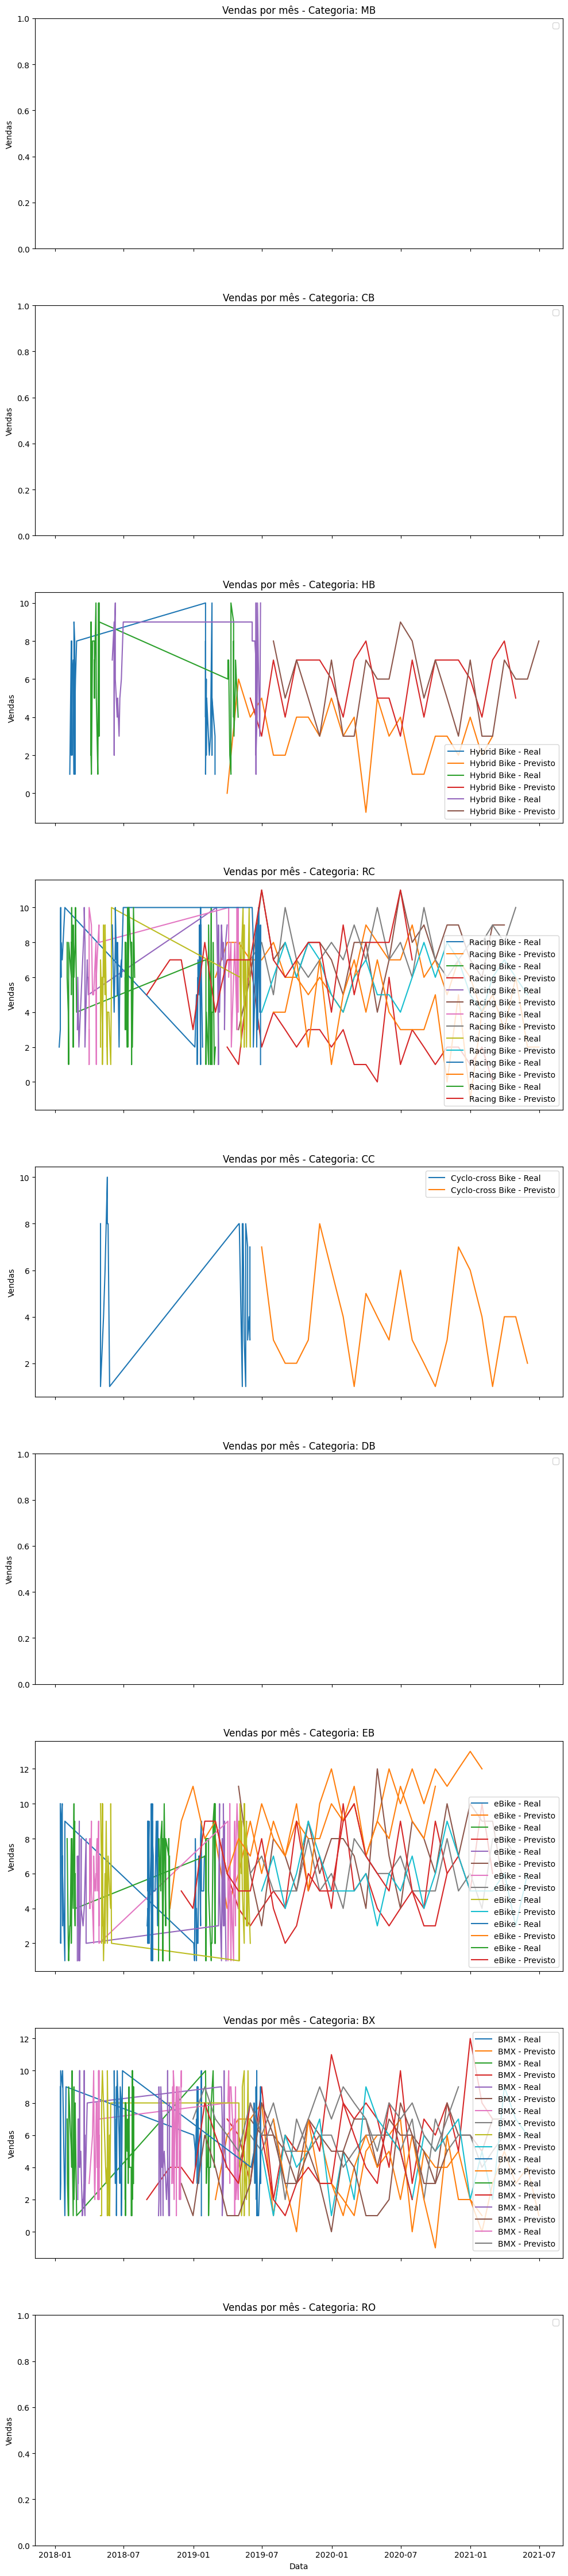

In [176]:
# Criação de um subplot para cada categoria de bicicleta
fig, axs = plt.subplots(len(categorias), 1, figsize=(10, 5 * len(categorias)), sharex=True)

# Loop para fazer as previsões para cada categoria e mês
for i, categoria in enumerate(categorias):
    categoria_axs = axs[i] if len(categorias) > 1 else axs
    categoria_axs.set_title(f"Vendas por mês - Categoria: {categoria}")
    categoria_axs.set_ylabel('Vendas')

    for month in range(1, 13):
        # Filtrar o dataframe pela categoria e mês atual
        categoria_mes_df = df[(df['prodcategoryid'] == categoria) & (df['month'] == month)]

        # Verificar se há dados suficientes para estimar os componentes sazonais
        if len(categoria_mes_df) >= 2 * 12:  # Pelo menos dois anos de dados (assumindo sazonalidade anual)
            # Converter a coluna 'createdat' para o índice do dataframe
            categoria_mes_df = categoria_mes_df.set_index('createdat')

            # Criar o modelo de suavização exponencial
            modelo = ExponentialSmoothing(categoria_mes_df['quantity'], seasonal_periods=12, trend='add', seasonal='add')

            # Ajustar o modelo aos dados
            modelo_fit = modelo.fit()

            # Fazer a previsão para os próximos dois anos
            previsao = modelo_fit.predict(start=len(categoria_mes_df), end=len(categoria_mes_df)+23)

            # Arredondar as previsões para números inteiros
            previsao = previsao.round().astype(int)

            # Obter o nome da categoria de bicicleta
            categoria_nome = categoria_mes_df['short_descr'].iloc[0]

            # Plotar as vendas reais
            categoria_axs.plot(categoria_mes_df.index, categoria_mes_df['quantity'], label=f'{categoria_nome} - Real')

            # Plotar as vendas previstas
            previsao_index = pd.date_range(start=categoria_mes_df.index[-1] + pd.DateOffset(months=1), periods=len(previsao), freq='M')
            categoria_axs.plot(previsao_index, previsao, label=f'{categoria_nome} - Previsto')

    categoria_axs.legend()

# Configuração do eixo x compartilhado
axs[-1].set_xlabel('Data')

# Exibição do gráfico
plt.tight_layout()
plt.show()